In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the 'src' folder to the path
sys.path.append(os.path.abspath('../src'))
from utils.preprocessing import load_and_prepare

In [2]:
# Core assets loaded individually for clarity
aapl = load_and_prepare('../data/AAPL.csv')
btc = load_and_prepare('../data/BTC-USD.csv')
gspc = load_and_prepare('../data/GSPC.csv')
eth = load_and_prepare('../data/ETH.csv')

# Store in a dictionary for easy group operations
assets = {
    'AAPL': aapl,
    'BTC-USD': btc, 
    'GSPC': gspc,
    'ETH': eth
}
# Now you can use individual variables or the dictionary as needed

In [3]:
## Debugging the datasets
# Debug your data structure directly
print("Dataset Analysis:")
print("-" * 50)

for name, df in assets.items():
    print(f"\nAsset: {name}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Index type: {type(df.index)}")
    print(f"First few rows:")
    print(df.head(3))
    print("-" * 30)

Dataset Analysis:
--------------------------------------------------

Asset: AAPL
Shape: (2614, 2)
Columns: ['price', 'log_return']
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
First few rows:
                price  log_return
Date                             
2015-01-05  23.604324   -0.028577
2015-01-06  23.606562    0.000095
2015-01-07  23.937572    0.013925
------------------------------

Asset: BTC-USD
Shape: (3799, 2)
Columns: ['price', 'log_return']
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
First few rows:
                 price  log_return
Date                              
2015-01-02  315.032013    0.002489
2015-01-03  281.082001   -0.114028
2015-01-04  264.195007   -0.061959
------------------------------

Asset: GSPC
Shape: (2614, 2)
Columns: ['price', 'log_return']
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
First few rows:
                  price  log_return
Date                               
2015-01-05  20

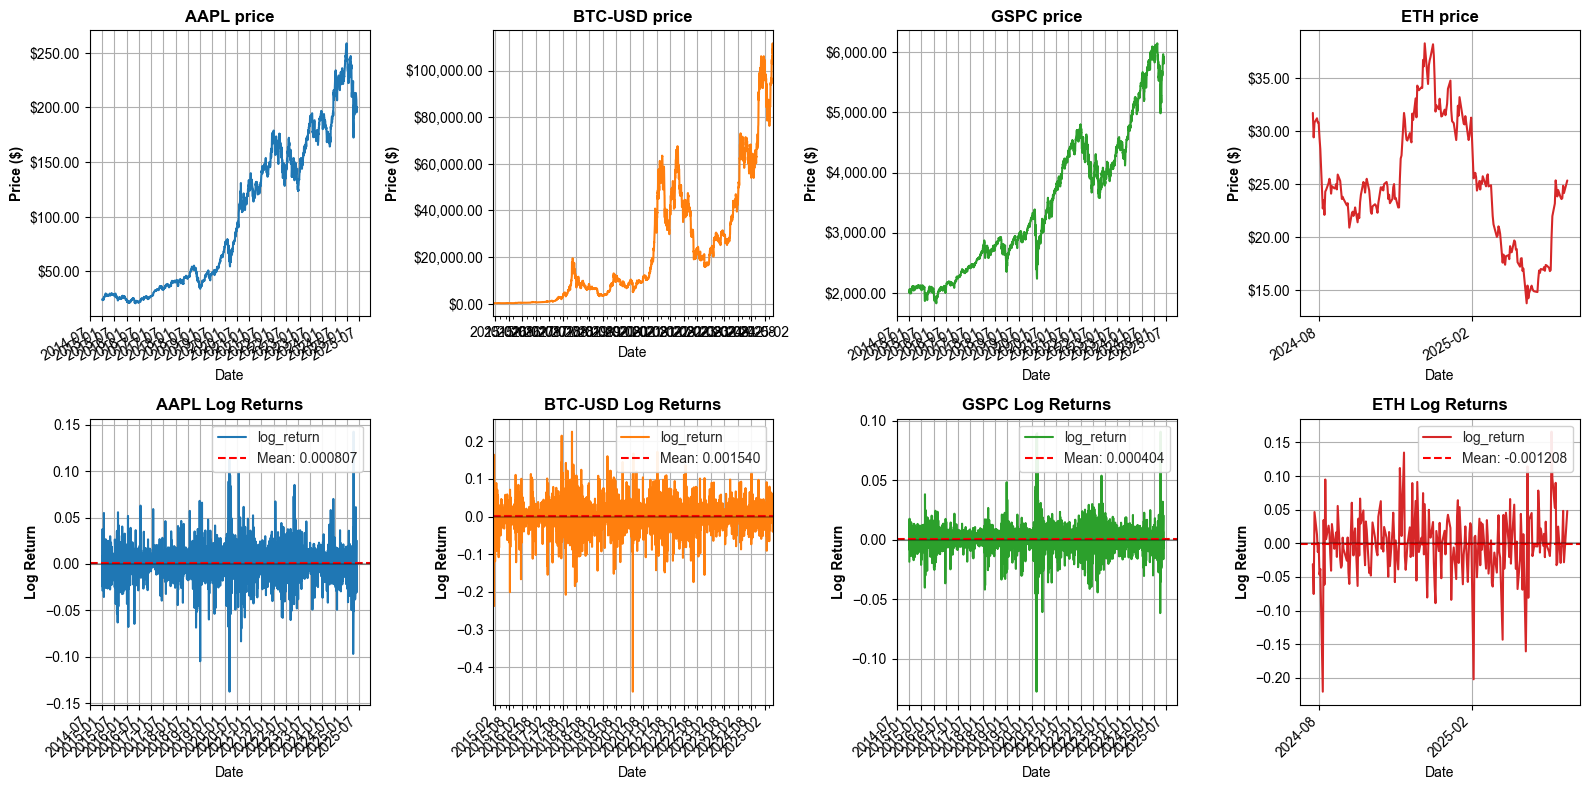

In [4]:
 # Plot all data
from utils.plots import plot_prices_and_returns

fig = plot_prices_and_returns(assets, figsize=(16, 8))
plt.show()
    
# # Plot just the most recent year (approximately 252 trading days)
# fig = plot_prices_and_returns(assets, figsize=(16, 8), recent_days=252)
# plt.show()

## Analysis Summanry
### Price Analysis (Top Row):
1. AAPL (Apple): Shows remarkable growth from around $25 in 2015 to peaks above $250 by 2024, representing roughly 10x growth over the period. The trajectory shows consistent upward momentum with some volatility spikes.
2. BTC-USD (Bitcoin): Exhibits the most dramatic price swings, starting near zero and reaching peaks around $100,000. The chart captures Bitcoin's notorious boom-bust cycles, with major rallies followed by significant corrections.
3. GSPC (S&P 500): Demonstrates steady long-term growth from about $2,000 to over $6,000, reflecting the broader U.S. stock market's performance. The growth is more measured compared to individual stocks or crypto.
4. ETH (Ethereum): Shows extreme volatility with prices ranging from around $15 to peaks above $35. The timeframe appears shorter (2024-2025) and captures significant price swings typical of cryptocurrency markets.

### Volatility Analysis (Bottom Row - Log Returns):
- The log returns reveal important risk characteristics:

1. AAPL: Relatively stable with mean return of 0.000807, showing occasional volatility spikes but generally contained fluctuations
2. BTC-USD: Highest volatility with mean return of 0.001540, displaying frequent large swings between +20% and -40% daily moves
3. GSPC: Most stable with mean return of 0.000404, reflecting the diversified nature of the index with smaller daily fluctuations
4. ETH: High volatility with negative mean return of -0.001208, showing the risky nature of cryptocurrency investments

### Key Insights:
1. Risk-Return Tradeoff: Cryptocurrencies (BTC, ETH) show higher potential returns but with significantly higher volatility
2. Traditional Assets: AAPL and S&P 500 show more predictable growth patterns with lower day-to-day volatility
3. Time Horizons: Different assets are shown over different periods, with crypto assets showing shorter but more volatile timeframes
4. Mean Returns: All assets except ETH show positive average daily returns, though ETH's negative mean may reflect a specific challenging period
